In [1]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
    
%load_ext autoreload
%autoreload 2

from tabGAN import TabGAN
from src import constants as const
import helpers
from v2_hp_tuning import fetch_hp_info

imports_path = "src//imports.ipynb"

%run "$imports_path"

if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [2]:
import pandas as pd
adult_dataset = pd.read_csv(os.path.join(const.dir.data_comparison(), "adult_edited.csv"))
boolean_train_indices_adult = np.load(
    os.path.join(const.dir.data_comparison(), "indices", "adult_edited", "bool_indices_0.npy")
)
adult_train = adult_dataset.loc[boolean_train_indices_adult,:]

In [3]:
from run_comparison_tensorflow import tabGAN_synthesizer
N_RUNS=1

In [48]:
helpers.measure_synthesizer_speed(lambda: tabGAN_synthesizer(adult_train, qt=False, qtr=False, ctgan=False, pac=1),
                       "tabGAN-sd", nruns=N_RUNS)

  0%|          | 0/1 [00:00<?, ?it/s]

Synthesizing with tabGAN


In [5]:
helpers.measure_synthesizer_speed(lambda: tabGAN_synthesizer(adult_train, qt=True, qtr=False, ctgan=False, pac=1),
                       "tabGAN-qt", nruns=N_RUNS)

  0%|          | 0/1 [00:00<?, ?it/s]

In [62]:
helpers.measure_synthesizer_speed(lambda: tabGAN_synthesizer(adult_train, qt=True, qtr=True, ctgan=False, pac=1),
                       "tabGAN-qtr", nruns=N_RUNS)

  0%|          | 0/1 [00:00<?, ?it/s]

Synthesizing with tabGAN-qtr


In [66]:
helpers.measure_synthesizer_speed(lambda: tabGAN_synthesizer(adult_train, qt=False, qtr=False, ctgan=True, pac=1,
                                                 train_step_critic_same_queries_for_critic_and_gen=True),
                       "ctabGAN-sd", nruns=N_RUNS)

  0%|          | 0/1 [00:00<?, ?it/s]

Synthesizing with ctabGAN


In [71]:
helpers.measure_synthesizer_speed(lambda: tabGAN_synthesizer(adult_train, qt=True, qtr=False, ctgan=True, pac=1,
                                                 train_step_critic_same_queries_for_critic_and_gen=True),
                       "ctabGAN-qt", nruns=N_RUNS)

  0%|          | 0/1 [00:00<?, ?it/s]

Synthesizing with ctabGAN-qt


In [72]:
helpers.measure_synthesizer_speed(lambda: tabGAN_synthesizer(adult_train, qt=True, qtr=True, ctgan=True, pac=1,
                                                 train_step_critic_same_queries_for_critic_and_gen=True),
                       "ctabGAN-qtr", nruns=N_RUNS)

  0%|          | 0/1 [00:00<?, ?it/s]

Synthesizing with ctabGAN-qtr


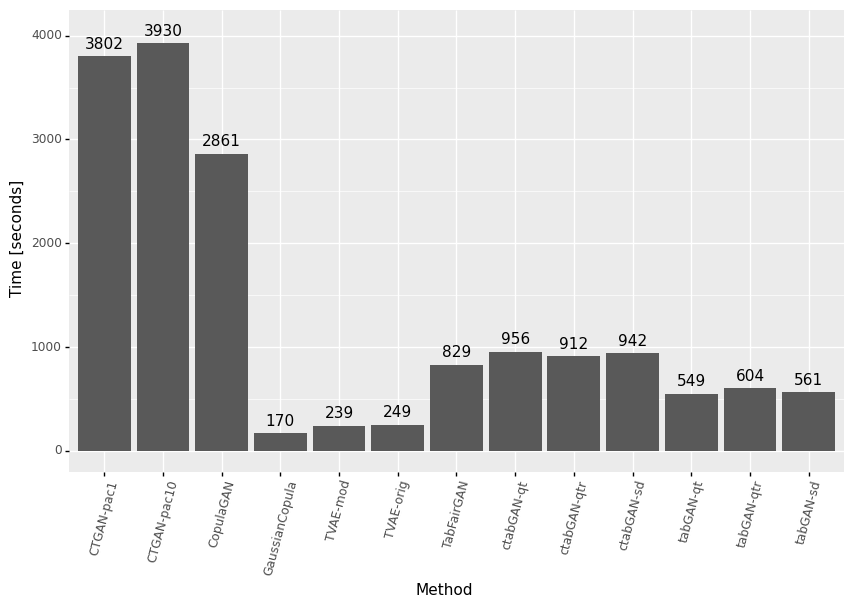

,Method,Time
0,tabGAN-sd,561.346385
1,tabGAN-qt,548.575309
2,tabGAN-qtr,604.142579
3,ctabGAN-sd,941.860568
4,ctabGAN-qt,956.384398
5,ctabGAN-qtr,911.929267
6,GaussianCopula,169.853392
7,CTGAN-pac1,3801.962512
8,CTGAN-pac10,3929.697039
9,CopulaGAN,2861.097259


In [35]:
import helpers.eval
helpers.eval.synthesizer_speed(["tabGAN-sd", "tabGAN-qt", "tabGAN-qtr", "ctabGAN-sd", "ctabGAN-qt", "ctabGAN-qtr",
                               "GaussianCopula", "CTGAN-pac1", "CTGAN-pac10", "CopulaGAN", "TVAE-orig", "TVAE-mod",
                               "TabFairGAN"],
                                rotation_x_axis_labels=75,
                               plot=True,
                              save_dir=const.dir.images(), save_path="total_synthesizer_train_time.pdf",
                              figsize=(10,6))

In [5]:
matplotlib.__version__

'3.4.3'

In [7]:
??helpers.eval.synthesizer_speed